# Fault Detection of Induction Motor using Deep Learning
## Case : Limited Data

## DATASET CREATION

In [ ]:
# importing libraries
import pandas as pd
import numpy as np

In [ ]:
# mounting drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# importing data
path = '/content/drive/MyDrive/Colab Notebooks/data_final.csv'
data = pd.read_csv(path)

In [ ]:
data  = data.sample(frac = 1)
data = data.reset_index(drop=True)
print(data)

     vib  speed   current  voltage  output
0   1.25     500     21.0      220       0
1   1.29    1440      4.5      230       0
2   1.34     500     21.0      220       1
3   1.35     500     21.0      220       1
4   1.89     500     21.0      220       1
5   0.90    1380      4.5      230       1
6   1.37     500     21.0      220       1
7   1.32    1430      4.5      230       0
8   1.24     500     21.0      220       0
9   1.28     500     21.0      220       1
10  1.34     500     21.0      220       1
11  1.44    1420      4.5      230       0
12  1.54    1450      4.5      230       0
13  1.29     500     21.0      220       1
14  1.40    1420      4.5      230       0
15  1.05    1460      4.5      230       1
16  1.04    1390      4.5      230       1
17  1.18     500     21.0      220       0
18  0.84     500     21.0      220       1
19  1.34    1390      4.5      230       0
20  0.94    1385      4.5      230       1
21  1.02    1340      4.5      230       1
22  1.32   

In [ ]:
# Description of data
data.describe()

,vib,speed,current,voltage,output
count,49.000000,49.000000,49.000000,49.000000,49.000000
mean,1.261633,1047.530612,10.561224,226.326531,0.489796
std,0.209974,467.507135,8.036786,4.870779,0.505076
min,0.820000,0.000000,4.500000,220.000000,0.000000
25%,1.120000,500.000000,4.500000,220.000000,0.000000
50%,1.300000,1380.000000,4.500000,230.000000,0.000000
75%,1.390000,1420.000000,21.000000,230.000000,1.000000
max,1.890000,1474.000000,21.000000,230.000000,1.000000


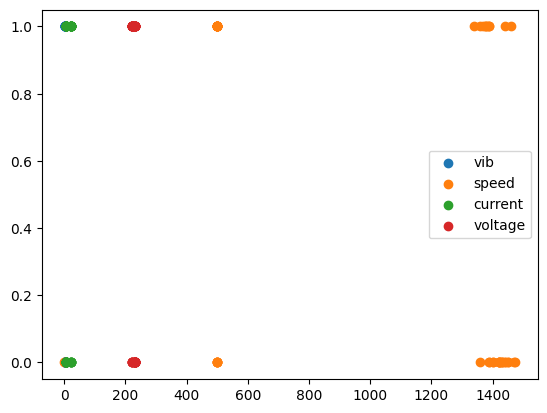

In [ ]:
# single plot visualizatons
import matplotlib.pyplot as plt

y=data['output']
x2=data['vib']
x3=data['speed ']
x4=data['current']
x5=data['voltage']

plt.scatter(x2,y)
plt.scatter(x3,y)
plt.scatter(x4,y)
plt.scatter(x5,y)
li=['vib','speed','current','voltage']
plt.legend(li)
plt.show()


## GENERATION OF SYNTHETIC DATA


In [ ]:
# Initial inspections for
no_f=data['output'].value_counts()[0]/len(data)*100
f=data['output'].value_counts()[1]/len(data)*100
print("No error=",no_f,"\nError =",f)

No error= 51.02040816326531 
Error = 48.97959183673469


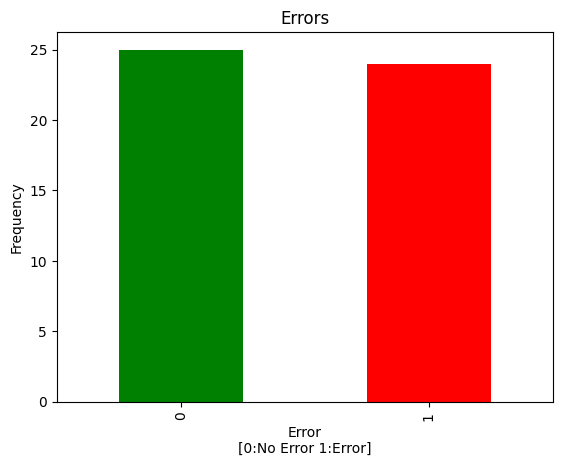

In [ ]:
# Plotting frequency on bar graph
import matplotlib.pyplot as plt
%matplotlib inline

count_classes = pd.value_counts(data['output'], sort = True).sort_index()
count_classes.plot(kind = 'bar',color=['green','red'])
plt.title("Errors")
plt.xlabel("Error\n[0:No Error 1:Error]")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# seperating classes with two labels
data_1=data[data.output==1]
data_0=data[data.output==0]

### TVAE Data Generation


In [ ]:
# loading original sdv for using the model feature
!pip install sdv
from sdv.metadata import SingleTableMetadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=data)

In [ ]:
from sdv.single_table import TVAESynthesizer
syn = TVAESynthesizer(metadata,epochs=100)
syn.fit(data)

### Data Generation

In [ ]:
x=syn.sample(num_rows=30000)

In [ ]:
data_final = x.copy()

In [ ]:
print(data_final)

        vib  speed   current  voltage  output
0      1.36    1393      4.6      230       0
1      1.41    1369      4.8      230       1
2      1.27    1359      4.6      230       0
3      1.37    1410      4.7      230       1
4      1.34    1381      5.2      230       0
...     ...     ...      ...      ...     ...
29995  1.32    1449      4.5      230       0
29996  1.27    1388      5.0      230       0
29997  1.29    1403      4.5      230       1
29998  1.31    1369      5.4      220       1
29999  1.43    1470      5.0      230       0

[30000 rows x 5 columns]


In [ ]:
data_final.describe()

,vib,speed,current,voltage,output
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,1.351776,1394.862200,4.791370,229.876000,0.388967
std,0.079208,76.432348,0.957427,1.106646,0.487524
min,1.030000,252.000000,4.500000,220.000000,0.000000
25%,1.300000,1364.000000,4.500000,230.000000,0.000000
50%,1.350000,1400.000000,4.700000,230.000000,0.000000
75%,1.400000,1436.000000,4.900000,230.000000,1.000000
max,1.740000,1474.000000,21.000000,230.000000,1.000000


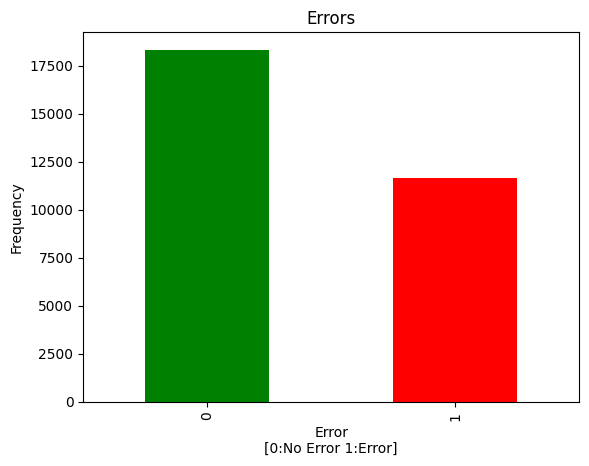

In [ ]:
# Plotting frequency on bar graph
import matplotlib.pyplot as plt
%matplotlib inline

count_classes = pd.value_counts(data_final['output'], sort = True).sort_index()
count_classes.plot(kind = 'bar',color=['green','red'])
plt.title("Errors")
plt.xlabel("Error\n[0:No Error 1:Error]")
plt.ylabel("Frequency")
plt.show()

## Binary Classifier

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
# Splitting the data into training and testing sets
train,test = train_test_split(data_final, test_size=0.2, random_state=42)

In [ ]:
x_train = train.drop('output', axis=1)
y_train = train['output']
x_test = test.drop('output', axis=1)
y_test = test['output']

In [ ]:
# Building the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(4,)),  # Input layer
    tf.keras.layers.Dense(128, activation='relu'),  # Hidden layer with 128 units and ReLU activation
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer with 1 unit and sigmoid activation
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               640       
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 769 (3.00 KB)
Trainable params: 769 (3.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Eval metrics
# Custom callback to collect training speed and convergence per epoch
from tensorflow.keras.callbacks import ModelCheckpoint, Callback
import time
class TrainingStatsCallback(Callback):
    def __init__(self):
        self.start_time = 0
        self.steps = 0
        self.speeds = []
        self.convergences = []

    def on_train_begin(self, logs=None):
        self.start_time = time.time()

    def on_train_batch_end(self, batch, logs=None):
        self.steps += 1

    def on_epoch_end(self, epoch, logs=None):
        if logs is not None:
            epoch_time = time.time() - self.start_time
            speed = epoch_time / self.steps
            self.speeds.append(speed)
            self.convergences.append(logs.get('loss'))
            self.steps = 0

In [ ]:

# Define the model checkpoint
checkpoint = ModelCheckpoint('model.h5', monitor='loss', verbose=0, save_best_only=True, mode='min')

# Define the training stats callback
stats_callback = TrainingStatsCallback()

# Training the model
model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[checkpoint, stats_callback])  #increase epoches to 2000 to get accuracy around 82 percent

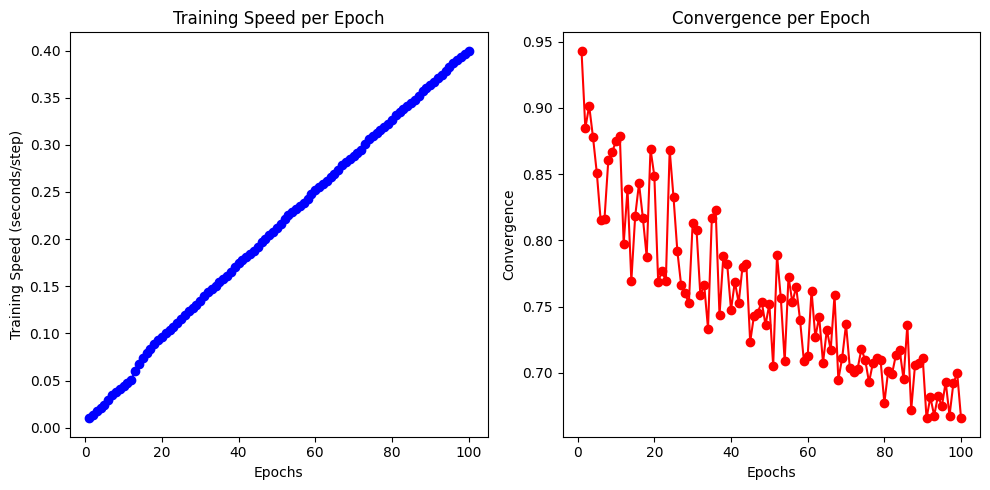

In [ ]:
# Training efficiency
# Plot the training speed and convergence per epoch
epochs = range(1, len(stats_callback.speeds) + 1)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, stats_callback.speeds, 'b-o')
plt.xlabel('Epochs')
plt.ylabel('Training Speed (seconds/step)')
plt.title('Training Speed per Epoch')

plt.subplot(1, 2, 2)
plt.plot(epochs, stats_callback.convergences, 'r-o')
plt.xlabel('Epochs')
plt.ylabel('Convergence')
plt.title('Convergence per Epoch')

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_train, y_train)
print(f"Test loss: {loss:.4f}")
print(f"Test accuracy: {accuracy:.4f}")

750/750 [==============================] - 2s 2ms/step - loss: 0.6493 - accuracy: 0.6195
Test loss: 0.6493
Test accuracy: 0.6195


## kNN Machine Learning

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
knn = KNeighborsClassifier(n_neighbors = 5) #n_neighbors = k

In [ ]:
knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)
print('knn Accuracy:',y_pred_knn)
print('Accuracy score using knn:',accuracy_score(y_test, y_pred_knn))
print('Classification report using knn',classification_report(y_test, y_pred_knn))
print('Confusion Matrix using knn',confusion_matrix(y_test, y_pred_knn))

knn Accuracy: [0 0 1 ... 1 1 0]
Accuracy score using knn: 0.626
Classification report using knn               precision    recall  f1-score   support

           0       0.68      0.73      0.70      3627
           1       0.53      0.46      0.49      2373

    accuracy                           0.63      6000
   macro avg       0.60      0.60      0.60      6000
weighted avg       0.62      0.63      0.62      6000

Confusion Matrix using knn [[2662  965]
 [1279 1094]]


## SVM Machine Learning

In [ ]:
from sklearn.svm import SVC
svm = SVC(random_state = 1)

In [ ]:
svm.fit(x_train,y_train)
y_pred_svm = svm.predict(x_test)
print('svm Accuracy:',y_pred_svm)
print('Accuracy score using svm:',accuracy_score(y_test, y_pred_svm))
print('Classification report using svm',classification_report(y_test, y_pred_svm))
print('Confusion Matrix using svm',confusion_matrix(y_test, y_pred_svm))

svm Accuracy: [0 0 0 ... 0 0 0]
Accuracy score using svm: 0.6083333333333333
Classification report using svm               precision    recall  f1-score   support

           0       0.61      1.00      0.76      3627
           1       1.00      0.01      0.02      2373

    accuracy                           0.61      6000
   macro avg       0.80      0.50      0.39      6000
weighted avg       0.76      0.61      0.46      6000

Confusion Matrix using svm [[3627    0]
 [2350   23]]


## Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rf = RandomForestClassifier(n_estimators = 100)

In [ ]:
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print('rf Accuracy:',y_pred_rf)
print('Accuracy score using rf:',accuracy_score(y_test, y_pred_rf))
print('Classification report using rf',classification_report(y_test, y_pred_rf))
print('Confusion Matrix using rf',confusion_matrix(y_test, y_pred_rf))

rf Accuracy: [0 1 0 ... 0 1 0]
Accuracy score using rf: 0.6288333333333334
Classification report using rf               precision    recall  f1-score   support

           0       0.68      0.72      0.70      3627
           1       0.53      0.49      0.51      2373

    accuracy                           0.63      6000
   macro avg       0.61      0.61      0.61      6000
weighted avg       0.62      0.63      0.63      6000

Confusion Matrix using rf [[2604 1023]
 [1204 1169]]


## Comparison of Model Accuracy

In [ ]:
print("For ANN:")
loss, accuracy = model.evaluate(x_train, y_train)
print("\nDNN Accuracy on Test Data: {}".format(accuracy))
print("\nDNN Loss on Test Data: {}".format(loss))
print("\nFor kNN:")
print('\nAccuracy score using knn:',accuracy_score(y_test, y_pred_knn))
print('\nClassification report using knn',classification_report(y_test, y_pred_knn))
print("\nFor SVM:")
print('\nAccuracy score using svm:',accuracy_score(y_test, y_pred_svm))
print('\nClassification report using svm',classification_report(y_test, y_pred_svm))
print("\nFor RF Classifier: ")
print('\nAccuracy score using rf:',accuracy_score(y_test, y_pred_rf))
print('\nClassification report using rf',classification_report(y_test, y_pred_rf))

For ANN:
750/750 [==============================] - 2s 2ms/step - loss: 0.6493 - accuracy: 0.6195

DNN Accuracy on Test Data: 0.6194999814033508

DNN Loss on Test Data: 0.6493322253227234

For kNN:

Accuracy score using knn: 0.626

Classification report using knn               precision    recall  f1-score   support

           0       0.68      0.73      0.70      3627
           1       0.53      0.46      0.49      2373

    accuracy                           0.63      6000
   macro avg       0.60      0.60      0.60      6000
weighted avg       0.62      0.63      0.62      6000


For SVM:

Accuracy score using svm: 0.6083333333333333

Classification report using svm               precision    recall  f1-score   support

           0       0.61      1.00      0.76      3627
           1       1.00      0.01      0.02      2373

    accuracy                           0.61      6000
   macro avg       0.80      0.50      0.39      6000
weighted avg       0.76      0.61      0.46     

## Testing Fault Prediction with Different Models

In [ ]:
# testing for five inputs with fault in first and fourth
x_new =[[1.12, 0,4.5,230], [5.35, 500,3.5,220], [1.59, 1450,6.5, 215],[1.44,2000,2.5,100],[1.41,1100,4,230]]
X_NEW = pd.DataFrame(x_new)

In [ ]:
X_NEW

,0,1,2,3
0,1.12,0,4.5,230
1,5.35,500,3.5,220
2,1.59,1450,6.5,215
3,1.44,2000,2.5,100
4,1.41,1100,4.0,230


In [ ]:
def calc(x):
    if x == 1:
        return "Fault detected"
    else:
        return "No fault detected"

In [ ]:

for i in range(5):

    x_new = pd.DataFrame(X_NEW.iloc[i]).transpose()
    print("\n\nFor ",i+1,"st input")

    prediction_1 = model.predict(x_new)
    predicted_class_1 = (prediction_1 > 0.5).astype(int)
    print("Predicted Class using ANN Binary Classifier:", calc(predicted_class_1[0][0]))

    prediction_2 = knn.predict(x_new)
    predicted_class_2 = (prediction_2 > 0.5).astype(int)
    print("Predicted Class using kNN:", calc(predicted_class_2[0]))

    prediction_3 = svm.predict(x_new)
    predicted_class_3 = (prediction_3 > 0.5).astype(int)
    print("Predicted Class using SVM:",calc(predicted_class_3[0]))

    prediction_4 = rf.predict(x_new)
    predicted_class_4 = (prediction_4 > 0.5).astype(int)
    print("Predicted Class using RF:", calc(predicted_class_4[0]))




For  1 st input
Predicted Class using ANN Binary Classifier: Fault Detected
Predicted Class using kNN: Fault Detected
Predicted Class using SVM: Fault Detected
Predicted Class using RF: Fault Detected


For  2 st input
Predicted Class using ANN Binary Classifier: No Fault Detected
Predicted Class using kNN: No Fault Detected
Predicted Class using SVM: No Fault Detected
Predicted Class using RF: No Fault Detected


For  3 st input
Predicted Class using ANN Binary Classifier: No Fault Detected
Predicted Class using kNN: No Fault Detected
Predicted Class using SVM: No Fault Detected
Predicted Class using RF: No Fault Detected


For  4 st input
Predicted Class using ANN Binary Classifier: Fault Detected
Predicted Class using kNN: Fault Detected
Predicted Class using SVM: Fault Detected
Predicted Class using RF: Fault Detected


For  5 st input
Predicted Class using ANN Binary Classifier: No Fault Detected
Predicted Class using kNN: No Fault Detected
Predicted Class using SVM: No Fault De